#  ARIMA 모델 개념 및 예측 예제

## 1️ ARIMA란?

**ARIMA**는 시계열 데이터를 예측하는 통계적 모델로, 다음 세 가지 구성요소를 포함합니다:

- **AR (AutoRegressive)**: 과거 시점 값들의 선형 결합  
  $$
  X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \varepsilon_t
  $$

- **I (Integrated)**: 차분을 통해 비정상 시계열을 정상화  
  $$
  Y_t = X_t - X_{t-1}
  $$

- **MA (Moving Average)**: 과거 오차들의 선형 결합  
  $$
  X_t = \mu + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \dots + \varepsilon_t
  $$

**ARIMA(p, d, q)**는 다음을 의미합니다:
- `p`: AR 차수 (자기회귀)
- `d`: 차분 횟수 (정상화 위해)
- `q`: MA 차수 (이동평균)

---

 **ARMA(Auto-Regressive Moving Average)** 모델은 데이터 안에 **'과거의 값(관성)'**과 **'과거의 오차(잔상)'**가 모두 포함되어 있을 때 사용.

현실 세계의 대부분의 데이터(주식, 기온, 판매량 등)는 어느 한 가지 성격만 갖기보다는 이 두 가지가 복합적으로 섞여 있는 경우가 많다.
---

## 1. ARMA 모델이 필요한 데이터의 특징

단순히 직전 값을 따라가는 것(AR)만으로는 부족하고, 갑자기 발생한 충격이 회복되는 과정(MA)까지 고려해야 할 때 조합.

* **AR 성분:** "어제 많이 팔렸으면 오늘도 많이 팔릴 거야." (추세/관성)
* **MA 성분:** "어제 갑자기 손님이 몰려서 재고가 부족했던 사건(오차)이 오늘 매출에 영향을 줄 거야." (충격/보정)

---

## 2. 수식으로 보는 조합

ARMA(1, 1) 모델을 수식으로 표현하면 두 모델을 단순히 더한 형태가 됩니다.

* $\phi Y_{t-1}$: **AR 파트** (어제의 값에 가중치를 곱함)
* $\theta \epsilon_{t-1}$: **MA 파트** (어제의 오차에 가중치를 곱함)

---

## 3. 왜 굳이 조합해서 쓸까요? (예시: 커피숍 매출)

만약 커피숍 매출 데이터를 분석한다면:

1. **AR 성격:** 날씨가 따뜻해지면서 아이스 아메리카노 판매량이 매일 조금씩 꾸준히 늘어납니다. (과거의 값이 미래에 영향을 줌)
2. **MA 성격:** 그런데 어제 점심때 근처 회사에서 50잔 단체 주문(예상치 못한 충격, \epsilon_{t-1})이 들어왔습니다. 이 충격 때문에 오늘 원두가 부족해져서 오늘 매출(Y_t)에 부정적인 영향을 줄 수 있습니다.

**AR만 쓰면** 단체 주문 같은 돌발 상황을 설명하기 어렵고, **MA만 쓰면** 꾸준히 증가하는 추세를 설명하기 어렵습니다. 그래서 이 둘을 합친 **ARMA**를 쓰는 것이 훨씬 정확합니다.

---

## 4. ARIMA

실제 데이터는 **ARMA**에 한 가지 기능을 더 추가한 **ARIMA**를 가장 많이 활용.

* **AR** (Auto-Regressive): 자기회귀
* **I** (Integrated): **차분** (데이터가 한쪽으로 쏠려있을 때 평평하게 펴주는 작업)
* **MA** (Moving Average): 이동평균





## 2️ 예제: ARIMA로 시계열 예측하기

###  라이브러리 로드 및 데이터 생성
```python

[ 4.96714153e-01  1.50682067e+00  3.78661480e+00  5.86811483e+00
  4.92112921e+00  5.26586304e+00  6.93449540e+00  5.51251970e+00
  3.26945188e+00  2.98764502e+00  5.36582307e-01 -9.10814725e-01
 -1.49696399e+00 -4.65836522e+00 -5.08020041e+00 -4.06228753e+00
 -4.16811370e+00 -2.03083764e+00 -2.04695034e+00 -1.05738867e+00
  3.46564877e+00  3.41930867e+00  5.20645447e+00  4.92033679e+00
  6.61089986e+00  7.61092259e+00  6.20428900e+00  7.12078299e+00
  5.13828757e+00  4.15339122e+00  2.39829339e+00  3.40719321e+00
  2.47576514e-01 -1.80279590e+00 -5.32737669e-01 -2.72084365e+00
 -9.46418986e-01 -2.30475510e+00 -4.67112310e-01  2.55177626e+00
  4.73846658e+00  5.81645325e+00  7.02327798e+00  8.04398128e+00
  7.67676059e+00  8.78015579e+00  8.89464381e+00  9.80220720e+00
  8.08254455e+00  4.68204482e+00  5.32408397e+00  3.16983275e+00
  1.58415174e+00  1.86659132e+00  1.67571694e+00  1.43128012e+00
  5.49989530e-03  1.34570265e+00  3.19233717e+00  5.33046016e+00
  5.52082576e+00  7.45942

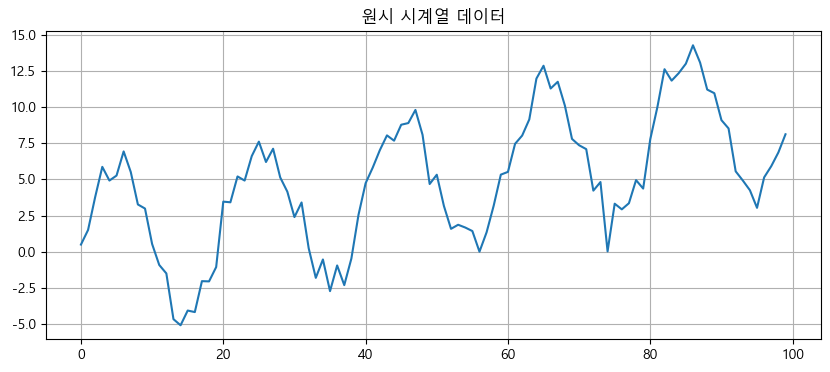

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from warnings import filterwarnings
filterwarnings("ignore")

plt.rcParams['font.family'] ="Malgun Gothic"
plt.rcParams['axes.unicode_minus']=False
# 시계열 데이터 생성
np.random.seed(42)
n = 100
time = np.arange(n)
trend = time * 0.1
seasonality = 5 * np.sin(2 * np.pi * time / 20)
noise = np.random.normal(0, 1, n)
data = trend + seasonality + noise

# print(data)

# 시계열그래프
ts = pd.Series(data)
ts.plot(title="원시 시계열 데이터", figsize=(10, 4))
plt.grid(True)
plt.show()


In [2]:
#  ADF 검정으로 정상성 확인

from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(ts)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] < 0.05:
    print("✅ 정상 시계열 (stationary)")
else:
    print("❌ 비정상 시계열 → 차분 필요")

ADF Statistic: -0.28088463131873487
p-value: 0.9281683474397114
❌ 비정상 시계열 → 차분 필요


차분 ADF Statistic: -8.096863813830119
차분 p-value: 1.3318404020000946e-12
✅ 정상 시계열 (stationary)


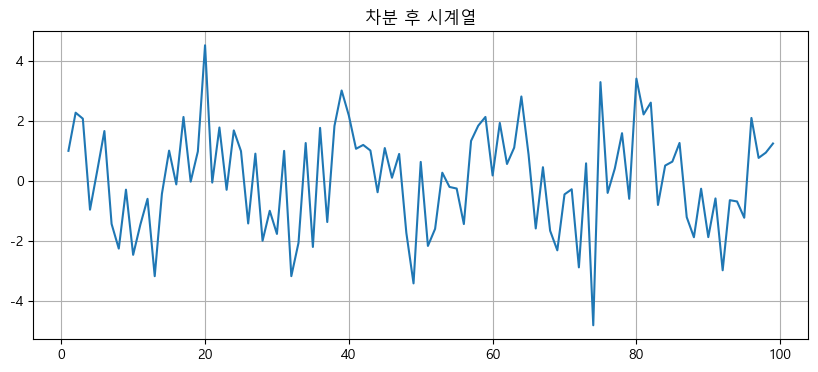

In [3]:
# 🔁 차분 후 정상성 확인

ts_diff = ts.diff().dropna() # 1.506821-0.496714, 3.786615-1.506821,.....

adf_result_diff = adfuller(ts_diff)
print("차분 ADF Statistic:", adf_result_diff[0])
print("차분 p-value:", adf_result_diff[1])
if adf_result_diff[1] < 0.05:
    print("✅ 정상 시계열 (stationary)")
else:
    print("❌ 비정상 시계열 → 차분 필요")
    
ts_diff.plot(title="차분 후 시계열", figsize=(10, 4))
plt.grid(True)
plt.show()


In [5]:
ts

0     0.496714
1     1.506821
2     3.786615
3     5.868115
4     4.921129
        ...   
95    3.036485
96    5.140838
97    5.915970
98    6.866187
99    8.120328
Length: 100, dtype: float64

In [4]:
# ARIMA(p, d, q) 설정 (여기선 예시로 (2,1,2))
model = ARIMA(ts, order=(2, 1, 2))
result = model.fit()
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -171.054
Date:                Thu, 18 Dec 2025   AIC                            352.108
Time:                        14:28:18   BIC                            365.083
Sample:                             0   HQIC                           357.358
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9022      0.004    518.615      0.000       1.895       1.909
ar.L2         -1.0000      0.001  -1443.743      0.000      -1.001      -0.999
ma.L1         -1.9014      0.086    -22.089      0.0

In [5]:
result

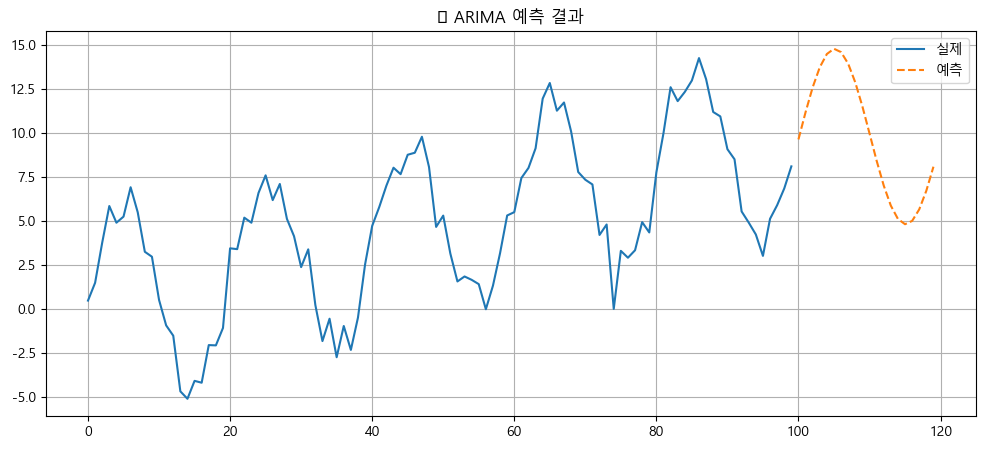

In [6]:
# 마지막 20개 미래 값 예측
forecast = result.forecast(steps=20)

# 전체 시계열 + 예측 시각화
plt.figure(figsize=(12, 5))
plt.plot(ts, label="실제")
plt.plot(np.arange(len(ts), len(ts) + 20), forecast, label="예측", linestyle='--')
plt.title("🔮 ARIMA 예측 결과")
plt.legend()
plt.grid(True)
plt.show()


✅ 정리
ARIMA는 정상 시계열을 전제로 함 → 비정상 시계열은 차분 처리 필요

(p,d,q)를 적절히 선택해야 함 → PACF, ACF, auto_arima 활용 가능

예측 범위는 forecast(steps=...)로 지정하여 확장 가능

#  AIC (Akaike Information Criterion)란?

## 1️ AIC란?

**AIC**는 통계 모델의 **적합도와 복잡도**를 모두 고려하여  
**가장 적절한 모델을 선택**하기 위한 기준입니다.

>  "데이터를 잘 설명하면서도 과적합되지 않은 모델"을 고르기 위한 지표

---

## 2️ AIC 공식

AIC는 아래와 같은 수식으로 계산됩니다:

$$
\text{AIC} = 2k - 2\ln(L)
$$

- $k$: 추정한 **모델 파라미터 수**
- $L$: 모델의 **최대 우도 함수값** (likelihood)
- $\ln(L)$: 로그 우도

---

## 3️ 쉽게 풀이하면?

| 항목       | 의미                                              |
|------------|---------------------------------------------------|
| $2k$       | 모델 **복잡도** (파라미터 수가 많을수록 불이익)     |
| $-2\ln(L)$ | 모델 **적합도** (데이터에 잘 맞을수록 이익)          |

➡️ **AIC 값이 작을수록 좋은 모델**

---

## 4️ 예시 코드 (ARIMA)

```python
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts, order=(2, 1, 2))
result = model.fit()

print("AIC 값:", result.aic)


In [4]:
def arima_aic_check(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [5]:
arima_aic_check( ts, [3,3,3] )

,order,AIC
23,p:2 d:1 q:2,352.089398
20,p:2 d:0 q:2,365.036208
17,p:1 d:2 q:2,376.595883
14,p:1 d:1 q:2,378.084400
22,p:2 d:1 q:1,382.274281
21,p:2 d:1 q:0,382.432788
8,p:0 d:2 q:2,383.367705
5,p:0 d:1 q:2,383.933492
24,p:2 d:2 q:0,385.478318
26,p:2 d:2 q:2,386.720943


### 예시

In [6]:
airDF = pd.read_csv('data/international-airline-passengers.txt',
                   index_col='time', parse_dates=['time'])
airDF

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [7]:
arima_aic_check( airDF['passengers'], (3,3,3) )

,order,AIC
23,p:2 d:1 q:2,1353.346641
22,p:2 d:1 q:1,1378.338320
14,p:1 d:1 q:2,1385.497545
17,p:1 d:2 q:2,1391.908470
26,p:2 d:2 q:2,1392.656888
25,p:2 d:2 q:1,1393.886573
8,p:0 d:2 q:2,1394.372844
13,p:1 d:1 q:1,1394.682505
21,p:2 d:1 q:0,1396.587695
5,p:0 d:1 q:2,1397.093462


In [8]:
# ARIMA(p, d, q) 설정 (여기선 예시로 (2,1,2))
model = ARIMA(airDF, order=(2, 1, 2))
result = model.fit()

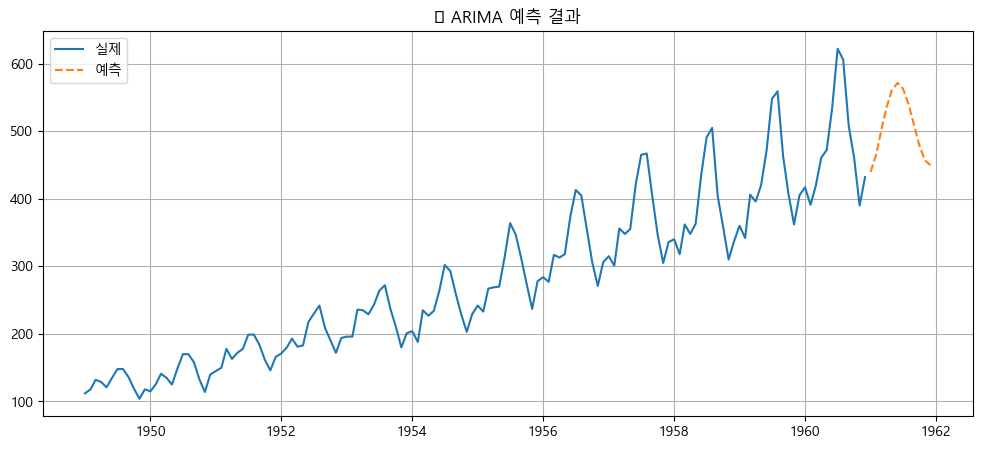

In [52]:
# 마지막 20개 미래 값 예측
forecast = result.forecast(steps=12)

# 전체 시계열 + 예측 시각화
plt.figure(figsize=(12, 5))
plt.plot(airDF, label="실제")
plt.plot(forecast, label="예측", linestyle='--')
plt.title("🔮 ARIMA 예측 결과")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:             passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Wed, 11 Jun 2025   AIC                           1353.347
Time:                        12:00:29   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.852      0.0

In [15]:
airDF.loc['1960-05':]

,passengers
time,
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [9]:
pred = result.predict('1960-07-01','1961-07-01',typ='levels')
pred

1960-07-01    539.260109
1960-08-01    594.969188
1960-09-01    557.269341
1960-10-01    459.377929
1960-11-01    423.851846
1960-12-01    378.930904
1961-01-01    439.854649
1961-02-01    465.296295
1961-03-01    500.666061
1961-04-01    535.971971
1961-05-01    561.690397
1961-06-01    571.314654
1961-07-01    562.974471
Freq: MS, Name: predicted_mean, dtype: float64

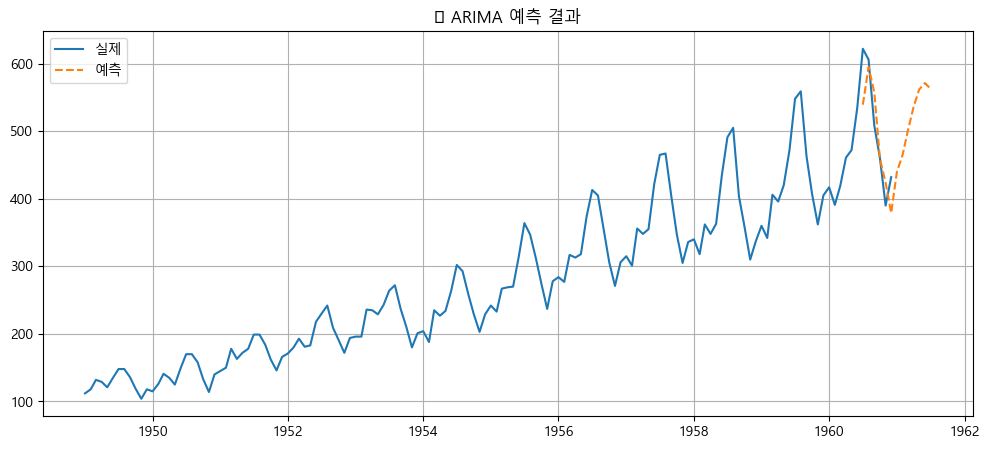

In [63]:
plt.figure(figsize=(12, 5))
plt.plot(airDF, label="실제")
plt.plot(pred, label="예측", linestyle='--')
plt.title("🔮 ARIMA 예측 결과")
plt.legend()
plt.grid(True)
plt.show()